In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct


Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25 (from 1)
Receiving objects: 100% (39/39), 177.08 MiB | 19.16 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [2]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/

dev.txt  test.txt  train.txt


In [3]:
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [4]:
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt']

In [5]:
def get_lines(filename):
    with open(filename,'r') as f:
      return f.readlines()

In [6]:
train_lines = get_lines(data_dir + "train.txt")

In [7]:
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [8]:
len(train_lines)

210040

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
  ...]

In [9]:
def preprocess_text_with_line_numbers(filename):
  input_lines = get_lines(filename)
  abstract_lines = ''
  abstract_samples = []

  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line
      abstract_lines = ''
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()

      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data ={}
        target_text_split = abstract_line.split('\t')
        line_data['target'] = target_text_split[0]
        line_data['text'] = target_text_split[1].lower()
        line_data['line_number'] = abstract_line_number
        line_data['total_lines'] = len(abstract_line_split) -1
        abstract_samples.append(line_data)

    else:
      abstract_lines += line

  return abstract_samples

In [10]:
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt")
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")

print(len(train_samples), len(val_samples), len(test_samples))

180040 30212 30135


In [11]:
import pandas as pd

In [12]:
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

In [13]:
train_df.head(10)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [14]:
train_df.target.value_counts()

,count
target,
METHODS,59353
RESULTS,57953
CONCLUSIONS,27168
BACKGROUND,21727
OBJECTIVE,13839


In [15]:
train_sentences = train_df['text'].tolist()
val_sentences  = val_df['text'].tolist()
test_sentences = test_df['text'].tolist()

len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
one_hot_enconder = OneHotEncoder(sparse_output=False)

In [18]:
train_labels_one_hot = one_hot_enconder.fit_transform(train_df['target'].to_numpy().reshape(-1,1))

In [19]:
val_labels_one_hot = one_hot_enconder.transform(val_df['target'].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_enconder.transform(test_df['target'].to_numpy().reshape(-1,1))

In [20]:
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df['target'].to_numpy())
val_labels_encoded = label_encoder.transform(val_df['target'].to_numpy())
test_labels_encoded = label_encoder.transform(test_df['target'].to_numpy())

In [23]:
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [24]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

## Model 0

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

model_0.fit(X=train_sentences,
            y=train_labels_encoded)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(X=val_sentences,
              y=val_labels_encoded)

0.7218323844829869

In [ ]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [26]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-08-22 12:47:10--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-08-22 12:47:10 (32.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [27]:
from helper_functions import calculate_results

In [28]:
baseline_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred=baseline_preds)
baseline_results

NameError: name 'baseline_preds' is not defined

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers


In [34]:
import tf_keras

In [35]:
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

26.338269273494777

In [36]:
import matplotlib.pyplot as plt

(array([4.2075e+04, 8.3771e+04, 3.6877e+04, 1.0945e+04, 3.9310e+03,
        1.4450e+03, 5.6000e+02, 2.2600e+02, 1.0100e+02, 4.5000e+01,
        2.0000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+01, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.  ,  15.75,  30.5 ,  45.25,  60.  ,  74.75,  89.5 , 104.25,
        119.  , 133.75, 148.5 , 163.25, 178.  , 192.75, 207.5 , 222.25,
        237.  , 251.75, 266.5 , 281.25, 296.  ]),
 <BarContainer object of 20 artists>)

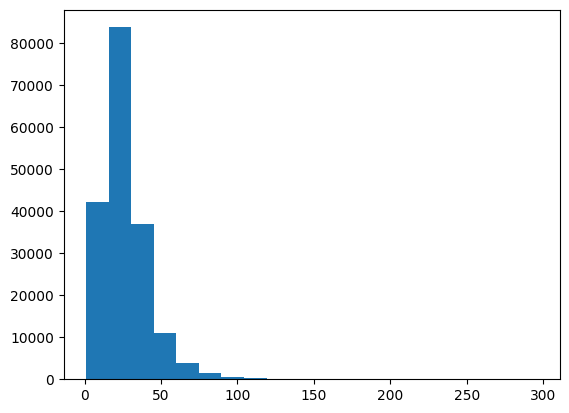

In [37]:
plt.hist(sent_lens, bins=20)

In [38]:
out_put_seq_len = int(np.percentile(sent_lens, 95))
out_put_seq_len

55

In [39]:
### number taken from table 2 in the article
max_tokens=68000

In [40]:
from tensorflow.keras import layers

In [41]:
from tensorflow.keras.layers import TextVectorization

In [42]:
text_vectorizer = TextVectorization(max_tokens=max_tokens,
                                    output_sequence_length = out_put_seq_len)

In [43]:
text_vectorizer.adapt(train_sentences)

In [44]:
import random

In [45]:
target_sentence = random.choice(train_sentences)
print(target_sentence)
print(text_vectorizer([target_sentence]))

control pn ( @ % glucose , @ g/kg per day protein/lipid ) was started within @ hours of birth .
tf.Tensor(
[[   35  2716   268  1518   160   108 35226    10  1973   219   227     4
    770     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]], shape=(1, 55), dtype=int64)


In [46]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(len(rct_20k_text_vocab))
print(rct_20k_text_vocab[:10])
print(rct_20k_text_vocab[-10:])

64841
['', '[UNK]', 'the', 'and', 'of', 'in', 'to', 'with', 'a', 'were']
['aarm', 'aaqol', 'aaq', 'aanhui', 'aana', 'aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [47]:
token_embed = layers.Embedding(
    input_dim=len(rct_20k_text_vocab),
    output_dim=128,
    mask_zero=True,
    name='token_embedding'
)

In [48]:
print(target_sentence)
print(text_vectorizer([target_sentence]))
print(token_embed(text_vectorizer([target_sentence])))

control pn ( @ % glucose , @ g/kg per day protein/lipid ) was started within @ hours of birth .
tf.Tensor(
[[   35  2716   268  1518   160   108 35226    10  1973   219   227     4
    770     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]], shape=(1, 55), dtype=int64)
tf.Tensor(
[[[-0.04200409  0.03113469  0.02932112 ... -0.01572735 -0.0311376
    0.02292626]
  [-0.0358518   0.02757304  0.00388578 ...  0.02221053 -0.03185765
   -0.04977136]
  [-0.0057685  -0.02733178 -0.03779491 ... -0.0475026   0.04810251
   -0.03509887]
  ...
  [ 0.04832489 -0.01218668 -0.04742689 ...  0.03327358 -0.02295982
   -0.00587237]
  [ 0.04832489 -0.01218668 -0.04742689 ...  0.03327358 -0.02295982
   -0.00587237]
  [ 0.04832489 -0.01218668 -0.04742689 ...  0.03327358 -0.02295982
   -0.00587237]]], shape

In [49]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [50]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

## Model 1 Conv1D with token embeddings

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs)
token_embeddings = token_embed(text_vectors)
x = layers.Conv1D(filters=64, kernel_size=5, activation='relu')(token_embeddings)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_1_conv1d')

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'conv1d_1' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "model_1_conv1d"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization                   │ (None, 55)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ token_embedding (Embedding)          │ (None, 55, 128)             │       8,299,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 51, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,340,997 (31.82 MB)

 Trainable params: 8,340,997 (31.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_model_1 = model_1.fit(train_dataset,
                              epochs=3,
                              steps_per_epoch=int(0.1*len(train_dataset)),
                              validation_data=valid_dataset,
                              validation_steps=int(0.1*len(valid_dataset)))

Epoch 1/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5072 - loss: 1.1903 - val_accuracy: 0.7197 - val_loss: 0.7313
Epoch 2/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7319 - loss: 0.7125 - val_accuracy: 0.7563 - val_loss: 0.6595
Epoch 3/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7608 - loss: 0.6489 - val_accuracy: 0.7842 - val_loss: 0.6144


In [ ]:
model_1.evaluate(valid_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7775 - loss: 0.6184


[0.6205143332481384, 0.778366208076477]

In [ ]:
model_1_pred_probs = model_1.predict(valid_dataset)

 14/945 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step    

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'conv1d_1' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step


(array([[3.82854670e-01, 1.96200386e-01, 7.85918608e-02, 3.12341660e-01,
         3.00115235e-02],
        [4.81482416e-01, 1.96041033e-01, 1.34067945e-02, 3.00160110e-01,
         8.90962407e-03],
        [2.42328301e-01, 2.01558284e-02, 4.49687382e-03, 7.32910216e-01,
         1.08897941e-04],
        ...,
        [4.40804342e-06, 8.26115021e-04, 6.38236117e-04, 7.18958472e-06,
         9.98524129e-01],
        [3.95633467e-02, 4.19720441e-01, 1.06507137e-01, 5.07991686e-02,
         3.83409888e-01],
        [2.07373396e-01, 5.97272694e-01, 9.67184082e-02, 4.75807339e-02,
         5.10548018e-02]], dtype=float32),
 (30212, 5))

In [ ]:
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [ ]:
model_1_results = calculate_results(y_true=val_labels_encoded,
                                  y_pred=model_1_preds)
model_1_results

{'accuracy': 77.83662121011518,
 'precision': 0.7742713019388086,
 'recall': 0.7783662121011519,
 'f1': 0.7749958269497877}

## model 2 Feature Extraction with TensorFlowHub

In [29]:
# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [ ]:
'''
random_train_sentence = random.choice(train_sentences)
print(random_train_sentence)
print(tf_hub_embedding_layer([random_train_sentence]))
'''

we have investigated whether the effect of treatment is different in different subtypes of ischemic stroke .
tf.Tensor(
[[-0.05581541  0.04362577 -0.01342645 -0.00505976 -0.00981243 -0.03068863
   0.03621616 -0.04297482  0.00828602  0.06456186  0.09761152 -0.04236764
   0.08001409  0.09499952 -0.03254711 -0.03899922 -0.0966438  -0.00534433
   0.04709829 -0.05925774  0.02515627  0.06910499 -0.03598689 -0.06457432
  -0.01398727 -0.00671708 -0.03133493  0.06065981  0.04101286  0.07619481
  -0.02652883  0.0979574   0.04920318  0.03806123 -0.01911794 -0.0615471
   0.0473183  -0.02636465 -0.01765397 -0.04995535 -0.00626403 -0.03216127
   0.06057511  0.05385944 -0.01429247  0.08025122  0.01519269  0.05045374
   0.03179296 -0.05123387 -0.0408795  -0.02345741  0.01967254  0.01397397
  -0.02882925  0.04305337 -0.00316103  0.01238215  0.04877854 -0.03637898
  -0.00808934  0.02307683 -0.03274402  0.02520465  0.00872963 -0.07090671
  -0.07758769  0.00306175  0.04197175  0.02610336  0.05001768 -0.00

In [ ]:
inputs = tf_keras.layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs)
x = tf_keras.layers.Dense(128, activation='relu')(pretrained_embedding)
outputs = tf_keras.layers.Dense(num_classes, activation='softmax')(x)

model_2 = tf_keras.Model(inputs, outputs, name='Model_2_USE')

model_2.compile(
    loss='categorical_crossentropy',
    optimizer=tf_keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model_2.summary()

Model: "Model_2_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder  (None, 512)               256797824 
  (KerasLayer)                                                   
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256864133 (979.86 MB)
Trainable params: 66309 (259.02 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
history_model_2 = model_2.fit(
    train_dataset,
    epochs=3,
    steps_per_epoch=int(0.1*len(train_dataset)),
    validation_data=valid_dataset,
    validation_steps = int(0.1*len(valid_dataset))
)

Epoch 1/3
562/562 [==============================] - 12s 12ms/step - loss: 0.9177 - accuracy: 0.6487 - val_loss: 0.7945 - val_accuracy: 0.6895
Epoch 2/3
562/562 [==============================] - 8s 15ms/step - loss: 0.7671 - accuracy: 0.7035 - val_loss: 0.7518 - val_accuracy: 0.7021
Epoch 3/3
562/562 [==============================] - 6s 11ms/step - loss: 0.7494 - accuracy: 0.7130 - val_loss: 0.7352 - val_accuracy: 0.7158


In [ ]:
model_2.evaluate(valid_dataset)

945/945 [==============================] - 16s 17ms/step - loss: 0.7378 - accuracy: 0.7165


[0.7377662062644958, 0.716503381729126]

In [ ]:
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_results = calculate_results(y_true=val_labels_encoded,
                                  y_pred=model_2_preds)
model_2_results

945/945 [==============================] - 11s 12ms/step


{'accuracy': 71.65033761419303,
 'precision': 0.7173020423445795,
 'recall': 0.7165033761419304,
 'f1': 0.7135572752867432}

## model 3 Conv 1D with character embedding

### creating a char tokenizer

In [30]:
def split_chars(text):
  return ' '.join(list(text))

In [31]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]

In [51]:
char_lens = [len(sentence) for sentence in train_sentences]
avg_char_len = np.mean(char_lens)
avg_char_len

149.3662574983337

(array([1.41175e+05, 3.71110e+04, 1.60000e+03, 1.27000e+02, 2.10000e+01,
        5.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 1.98857143e+02, 3.96714286e+02, 5.94571429e+02,
        7.92428571e+02, 9.90285714e+02, 1.18814286e+03, 1.38600000e+03]),
 <BarContainer object of 7 artists>)

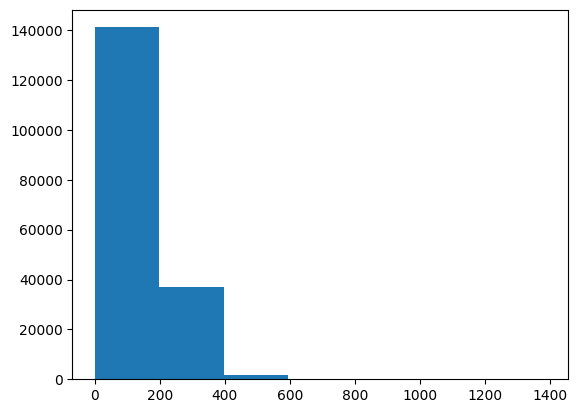

In [52]:
plt.hist(char_lens, bins=7)

In [53]:
output_seq_char_len = int(np.percentile(char_lens,95))
output_seq_char_len

290

In [54]:
import string

alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
NUM_CHAR_TOKENS = len(alphabet) + 2 #adding space and OOV out of vocab
NUM_CHAR_TOKENS

70

In [56]:
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length=output_seq_char_len,
                                    #standardize='lower_and_strip_punctuation',
                                    name = 'char_vectorizer')

In [57]:
char_vectorizer.adapt(train_chars)

In [58]:
char_vocab = char_vectorizer.get_vocabulary()

In [59]:
len(char_vocab), char_vocab[:5]

(28, ['', '[UNK]', 'e', 't', 'i'])

In [60]:
random_train_char = random.choice(train_chars)
print(random_train_char)
print(char_vectorizer([random_train_char]))

c h r o n i c   p i s t a c h i o   c o n s u m p t i o n   i s   e m e r g i n g   a s   a   u s e f u l   n u t r i t i o n a l   s t r a t e g y   f o r   t h e   p r e d i a b e t i c   s t a t e   .
tf.Tensor(
[[11 13  8  7  6  4 11 14  4  9  3  5 11 13  4  7 11  7  6  9 16 15 14  3
   4  7  6  4  9  2 15  2  8 18  4  6 18  5  9  5 16  9  2 17 16 12  6 16
   3  8  4  3  4  7  6  5 12  9  3  8  5  3  2 18 19 17  7  8  3 13  2 14
   8  2 10  4  5 22  2  3  4 11  9  3  5  3  2  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  

In [61]:
char_embed = tf_keras.layers.Embedding(input_dim=len(char_vocab),
                                       output_dim=25, #this number comes from the paper we're following
                                       mask_zero=True,
                                       name='char_embed'
                                       )

In [62]:
print(random_train_char)
print(char_embed(char_vectorizer([random_train_char])))

c h r o n i c   p i s t a c h i o   c o n s u m p t i o n   i s   e m e r g i n g   a s   a   u s e f u l   n u t r i t i o n a l   s t r a t e g y   f o r   t h e   p r e d i a b e t i c   s t a t e   .
tf.Tensor(
[[[ 0.00951938 -0.00480958 -0.01733158 ...  0.02034923 -0.0371484
    0.03141619]
  [ 0.03814818 -0.04055371 -0.03409443 ...  0.0141455   0.0257155
    0.03973366]
  [ 0.03887096 -0.03572246 -0.02453274 ... -0.03934877  0.03043551
    0.02059417]
  ...
  [-0.02107688 -0.03756758 -0.00097011 ...  0.02394355  0.04683753
    0.0361152 ]
  [-0.02107688 -0.03756758 -0.00097011 ...  0.02394355  0.04683753
    0.0361152 ]
  [-0.02107688 -0.03756758 -0.00097011 ...  0.02394355  0.04683753
    0.0361152 ]]], shape=(1, 290, 25), dtype=float32)


In [ ]:
input = tf_keras.layers.Input(shape=(1,), dtype=tf.string)
char_vectors = tf_keras.layers.Lambda(char_vectorizer)(input)
char_embedding = char_embed(char_vectors)
x = tf_keras.layers.Conv1D(filters=64, kernel_size=5, padding='same', activation='relu')(char_embedding)
x = tf_keras.layers.GlobalMaxPool1D()(x)
outputs = tf_keras.layers.Dense(num_classes, activation='softmax')(x)

model_3 = tf_keras.Model(input, outputs, name='model_3_char_embedding')

model_3.compile(
    loss='categorical_crossentropy',
    optimizer=tf_keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_3.summary()

Model: "model_3_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 1)]               0         
                                                                 
 lambda_3 (Lambda)           (None, None)              0         
                                                                 
 char_embed (Embedding)      (None, None, 25)          700       
                                                                 
 conv1d_3 (Conv1D)           (None, None, 64)          8064      
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 5)                 325       
                                            

In [63]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
valid_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
model_3_history = model_3.fit(train_char_dataset,
                             epochs=3,
                             steps_per_epoch=int(0.1*len(train_char_dataset)),
                             validation_data=valid_char_dataset,
                             validation_steps=int(0.1*len(valid_char_dataset)))

Epoch 1/3
562/562 [==============================] - 4s 6ms/step - loss: 1.2773 - accuracy: 0.4705 - val_loss: 1.1333 - val_accuracy: 0.5399
Epoch 2/3
562/562 [==============================] - 4s 7ms/step - loss: 1.0840 - accuracy: 0.5584 - val_loss: 1.0149 - val_accuracy: 0.5938
Epoch 3/3
562/562 [==============================] - 3s 5ms/step - loss: 1.0001 - accuracy: 0.6020 - val_loss: 0.9514 - val_accuracy: 0.6257


In [ ]:
model_3.evaluate(valid_char_dataset)

945/945 [==============================] - 5s 6ms/step - loss: 0.9665 - accuracy: 0.6175


[0.9664726257324219, 0.6175360679626465]

In [ ]:
model_3_pred_probs = model_3.predict(valid_char_dataset)
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_results = calculate_results(y_true=val_labels_encoded,
                                  y_pred=model_3_preds)
model_3_results

945/945 [==============================] - 5s 5ms/step


{'accuracy': 61.75360783794519,
 'precision': 0.6220354366982482,
 'recall': 0.6175360783794519,
 'f1': 0.6063218953924085}

## Model 4 Combining pretrained token embedding + char embedding

In [ ]:
#crating a token input/outputs model
token_inputs = tf_keras.layers.Input(shape=[], dtype=tf.string, name='token_input')
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = tf_keras.layers.Dense(128, activation='relu')(token_embeddings)
token_model = tf_keras.Model(inputs=token_inputs, outputs=token_outputs)

#creating a char inputs/outputs model
char_inputs = tf_keras.layers.Input(shape=(1,), dtype=tf.string, name='char_input')
char_vectors = tf_keras.layers.Lambda(char_vectorizer)(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_LSTM = tf_keras.layers.Bidirectional(tf_keras.layers.LSTM(24))(char_embeddings)
char_model = tf_keras.Model(inputs=char_inputs, outputs=char_bi_LSTM)

#combining token and char inputs
token_char_concat = tf_keras.layers.Concatenate(name='token_char_hybrid')([token_model.output, char_model.output])

#create output layers - adding in dropouts as discussed in the paper
combined_dropout = tf_keras.layers.Dropout(0.5)(token_char_concat)
combined_dense = tf_keras.layers.Dense(128, activation='relu')(combined_dropout)
final_dropout = tf_keras.layers.Dropout(0.5)(combined_dense)
combined_output = tf_keras.layers.Dense(num_classes, activation='softmax')(final_dropout)

#create model
model_4 = tf_keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=combined_output,
                         name='model_4_token_char_embedding')

In [ ]:
model_4.summary()

Model: "model_4_token_char_embedding"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 lambda_4 (Lambda)           (None, None)                 0         ['char_input[0][0]']          
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978   ['token_input[0][0]']         
  (KerasLayer)                                            24           

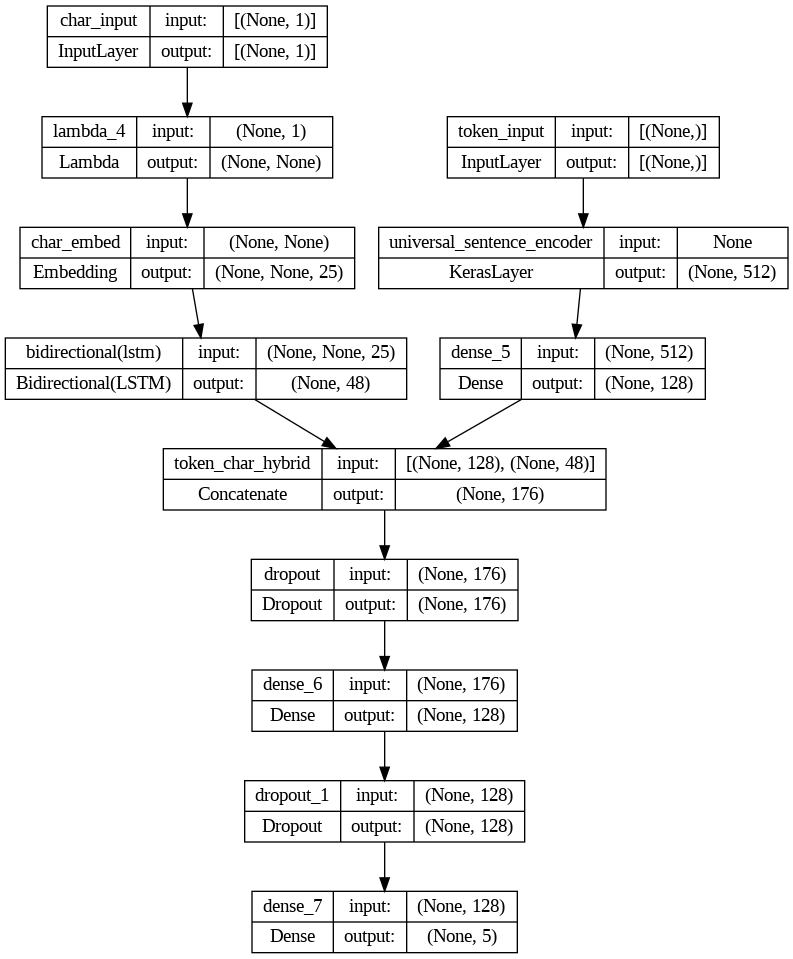

In [ ]:
from tf_keras.utils import plot_model
plot_model(model_4, show_shapes = True)

In [ ]:
model_4.compile(
    loss='categorical_crossentropy',
    optimizer=tf_keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [64]:
train_token_char = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_token_char_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_token_char_dataset = tf.data.Dataset.zip((train_token_char, train_token_char_labels))

train_char_token_dataset = train_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

valid_token_char = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
valid_token_char_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
valid_token_char_dataset = tf.data.Dataset.zip((valid_token_char, valid_token_char_labels))

valid_char_token_dataset = valid_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_char_token_dataset, valid_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
history_model_4 = model_4.fit(train_char_token_dataset,
                              epochs=3,
                              steps_per_epoch=int(0.1*len(train_char_token_dataset)),
                              validation_data=valid_char_token_dataset,
                              validation_steps=int(0.1*len(valid_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 41s 49ms/step - loss: 0.9866 - accuracy: 0.6092 - val_loss: 0.7725 - val_accuracy: 0.7061
Epoch 2/3
562/562 [==============================] - 25s 44ms/step - loss: 0.8003 - accuracy: 0.6933 - val_loss: 0.7100 - val_accuracy: 0.7337
Epoch 3/3
562/562 [==============================] - 23s 41ms/step - loss: 0.7687 - accuracy: 0.7059 - val_loss: 0.6880 - val_accuracy: 0.7443


In [ ]:
model_4.evaluate(valid_char_token_dataset)

945/945 [==============================] - 33s 35ms/step - loss: 0.6963 - accuracy: 0.7355


[0.6963116526603699, 0.7354693412780762]

In [ ]:
model_4_pred_probs = model_4.predict(valid_char_token_dataset)
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_results = calculate_results(y_true=val_labels_encoded,
                                  y_pred=model_4_preds)

945/945 [==============================] - 23s 19ms/step


In [ ]:
model_4_results

{'accuracy': 73.54693499271812,
 'precision': 0.7354147685614781,
 'recall': 0.7354693499271813,
 'f1': 0.7343114784819521}

### Creating positional embeddings

<Axes: ylabel='Frequency'>

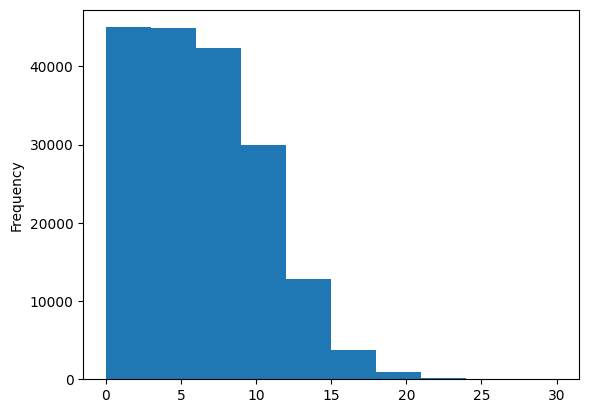

In [66]:
train_df['line_number'].plot.hist()

In [69]:
train_line_numbers_one_hot = tf.one_hot(train_df['line_number'].to_numpy(), depth = 15)
val_line_numbers_one_hot = tf.one_hot(val_df['line_number'].to_numpy(), depth = 15)
test_line_numbers_one_hot = tf.one_hot(test_df['line_number'].to_numpy(), depth = 15)

TensorShape([180040, 15])

<Axes: ylabel='Frequency'>

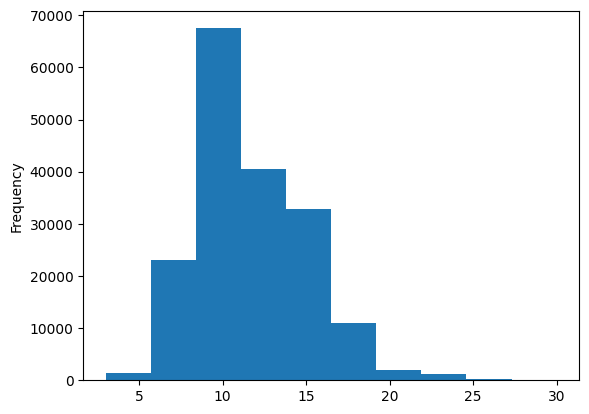

In [70]:
train_df['total_lines'].plot.hist()

In [72]:
train_total_lines_one_hot = tf.one_hot(train_df['total_lines'].to_numpy(), depth = 20)
val_total_lines_one_hot = tf.one_hot(val_df['total_lines'].to_numpy(), depth = 20)
test_total_lines_one_hot = tf.one_hot(test_df['total_lines'].to_numpy(), depth = 20)

### Building a tribid token-level model

combining outputs of token leve and char level model and also the outputs of the line number and total lines feature model

In [73]:
token_inputs = tf_keras.layers.Input(shape=[], dtype=tf.string, name='token_inputs')
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = tf_keras.layers.Dense(128, activation='relu')(token_embeddings)
token_model = tf_keras.Model(inputs=token_inputs, outputs=token_outputs)

char_inputs = tf_keras.layers.Input(shape=(1,), dtype=tf.string, name='char_inputs')
char_vectors = tf_keras.layers.Lambda(char_vectorizer)(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_LSTM = tf_keras.layers.Bidirectional(tf_keras.layers.LSTM(24))(char_embeddings)
char_model = tf_keras.Model(inputs=char_inputs, outputs=char_bi_LSTM)

In [74]:
line_number_inputs = tf_keras.layers.Input(shape=(15,), dtype=tf.float32, name='line_number_inputs')
line_number_outputs = tf_keras.layers.Dense(32, activation='relu')(line_number_inputs)
line_number_model = tf_keras.Model(inputs=line_number_inputs, outputs=line_number_outputs)

total_lines_inputs = tf_keras.layers.Input(shape=(20,), dtype=tf.float32, name='total_lines_inputs')
total_lines_outputs = tf_keras.layers.Dense(32, activation='relu')(total_lines_inputs)
total_lines_model = tf_keras.Model(inputs=total_lines_inputs, outputs=total_lines_outputs)

In [76]:
combined_embeddings = tf_keras.layers.Concatenate(name='combined_embeddings')([token_model.output, char_model.output])

z = tf_keras.layers.Dense(256, activation='relu')(combined_embeddings)
z = tf_keras.layers.Dropout(0.5)(z)

tribid_embeddings = tf_keras.layers.Concatenate(name='char_token_positional_embedding')([line_number_outputs, total_lines_outputs, z])

In [77]:
output_layer = tf_keras.layers.Dense(5, activation='softmax', name='output_layer')(tribid_embeddings)

In [80]:
model_5 = tf_keras.Model(inputs=[line_number_model.input,
                                 total_lines_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer,
                         name='tribid_embedding_model')

In [88]:
model_5.compile(
    loss=tf_keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
    optimizer=tf_keras.optimizers.Adam(),
    metrics=['accuracy']
)

### creating tribid datasets using tf.data

In [89]:
train_char_token_pos_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot,
                                                                train_total_lines_one_hot,
                                                                train_sentences,
                                                                train_chars))

train_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_pos_dataset = tf.data.Dataset.zip((train_char_token_pos_data, train_char_token_pos_labels))
train_char_token_pos_dataset = train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_char_token_pos_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))

val_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_pos_dataset = tf.data.Dataset.zip((val_char_token_pos_data, val_char_token_pos_labels))
val_char_token_pos_dataset = val_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [90]:
model_5.fit(train_char_token_pos_dataset,
            epochs=3,
            steps_per_epoch=int(0.1*len(train_char_token_pos_dataset)),
            validation_data=val_char_token_pos_dataset,
            validation_steps=int(0.1*len(val_char_token_pos_dataset)))

Epoch 1/3
562/562 [==============================] - 50s 54ms/step - loss: 1.1016 - accuracy: 0.7195 - val_loss: 0.9853 - val_accuracy: 0.8059
Epoch 2/3
562/562 [==============================] - 42s 75ms/step - loss: 0.9697 - accuracy: 0.8129 - val_loss: 0.9529 - val_accuracy: 0.8248
Epoch 3/3
562/562 [==============================] - 24s 44ms/step - loss: 0.9518 - accuracy: 0.8205 - val_loss: 0.9433 - val_accuracy: 0.8298


In [91]:
model_5_pred_probs=model_5.predict(val_char_token_pos_dataset, verbose=1)
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_results = calculate_results(y_true=val_labels_encoded,
                                  y_pred=model_5_preds)
model_5_results

945/945 [==============================] - 24s 20ms/step


{'accuracy': 83.15238977889581,
 'precision': 0.8308827432781285,
 'recall': 0.8315238977889581,
 'f1': 0.8306271915432024}